In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_original = pd.read_csv('student-total.csv')
df_original = df_original.drop(columns='index')

In [3]:
df_original = df_original.select_dtypes(exclude=["object"])
df_original = df_original.iloc[:,:-3]

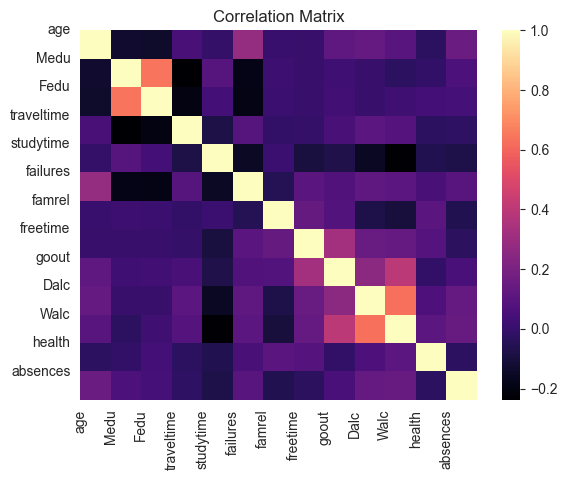

In [4]:
matrix = df_original.corr()
sns.heatmap(matrix, cmap="magma")
# corrMat = plt.matshow(matrix, fignum = 1)
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=90)
plt.yticks(range(len(matrix.columns)), matrix.columns)

plt.title('Correlation Matrix')
plt.savefig('corrmat.png')

In [5]:
# Dataset with some uninterested features removed
df = pd.read_csv('student.csv')
df

,sex,age,famsize,Pstatus,Medu,Fedu,famrel,Mjob,Fjob,studytime,failures,higher,absences,G3,romantic,freetime,goout,health,Dalc,Walc
0,F,18,GT3,A,4,4,4,at_home,teacher,2,0,yes,6,6,no,3,4,3,1,1
1,F,17,GT3,T,1,1,5,at_home,other,2,0,yes,4,6,no,3,3,3,1,1
2,F,15,LE3,T,1,1,4,at_home,other,2,3,yes,10,10,no,3,2,3,2,3
3,F,15,GT3,T,4,2,3,health,services,3,0,yes,2,15,yes,2,2,5,1,1
4,F,16,GT3,T,3,3,4,other,other,2,0,yes,4,10,no,3,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,2,3,5,services,other,3,1,yes,4,10,no,4,2,5,1,2
1040,F,18,LE3,T,3,1,4,teacher,services,2,0,yes,4,16,no,3,4,1,1,1
1041,F,18,GT3,T,1,1,1,other,other,2,0,yes,6,9,no,1,1,5,1,1
1042,M,17,LE3,T,3,1,2,services,services,1,0,yes,6,10,no,4,5,2,3,4


In [6]:
# Students that normally drink on the weekend but no during the week
df[df['Dalc'] == 1]['Walc'].value_counts(normalize=True)

Walc
1    0.537827
2    0.244842
3    0.145805
4    0.059147
5    0.012380
Name: proportion, dtype: float64

In [17]:
df

,sex,age,famsize,Pstatus,Medu,Fedu,famrel,Mjob,Fjob,studytime,failures,higher,absences,G3,romantic,freetime,goout,health,Dalc,Walc
0,F,18,GT3,A,4,4,4,at_home,teacher,2,0,yes,6,6,no,3,4,3,1,1
1,F,17,GT3,T,1,1,5,at_home,other,2,0,yes,4,6,no,3,3,3,1,1
2,F,15,LE3,T,1,1,4,at_home,other,2,3,yes,10,10,no,3,2,3,2,3
3,F,15,GT3,T,4,2,3,health,services,3,0,yes,2,15,yes,2,2,5,1,1
4,F,16,GT3,T,3,3,4,other,other,2,0,yes,4,10,no,3,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,2,3,5,services,other,3,1,yes,4,10,no,4,2,5,1,2
1040,F,18,LE3,T,3,1,4,teacher,services,2,0,yes,4,16,no,3,4,1,1,1
1041,F,18,GT3,T,1,1,1,other,other,2,0,yes,6,9,no,1,1,5,1,1
1042,M,17,LE3,T,3,1,2,services,services,1,0,yes,6,10,no,4,5,2,3,4


In [27]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    print(nGraphRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.savefig('distributions.png')
    plt.show()

3


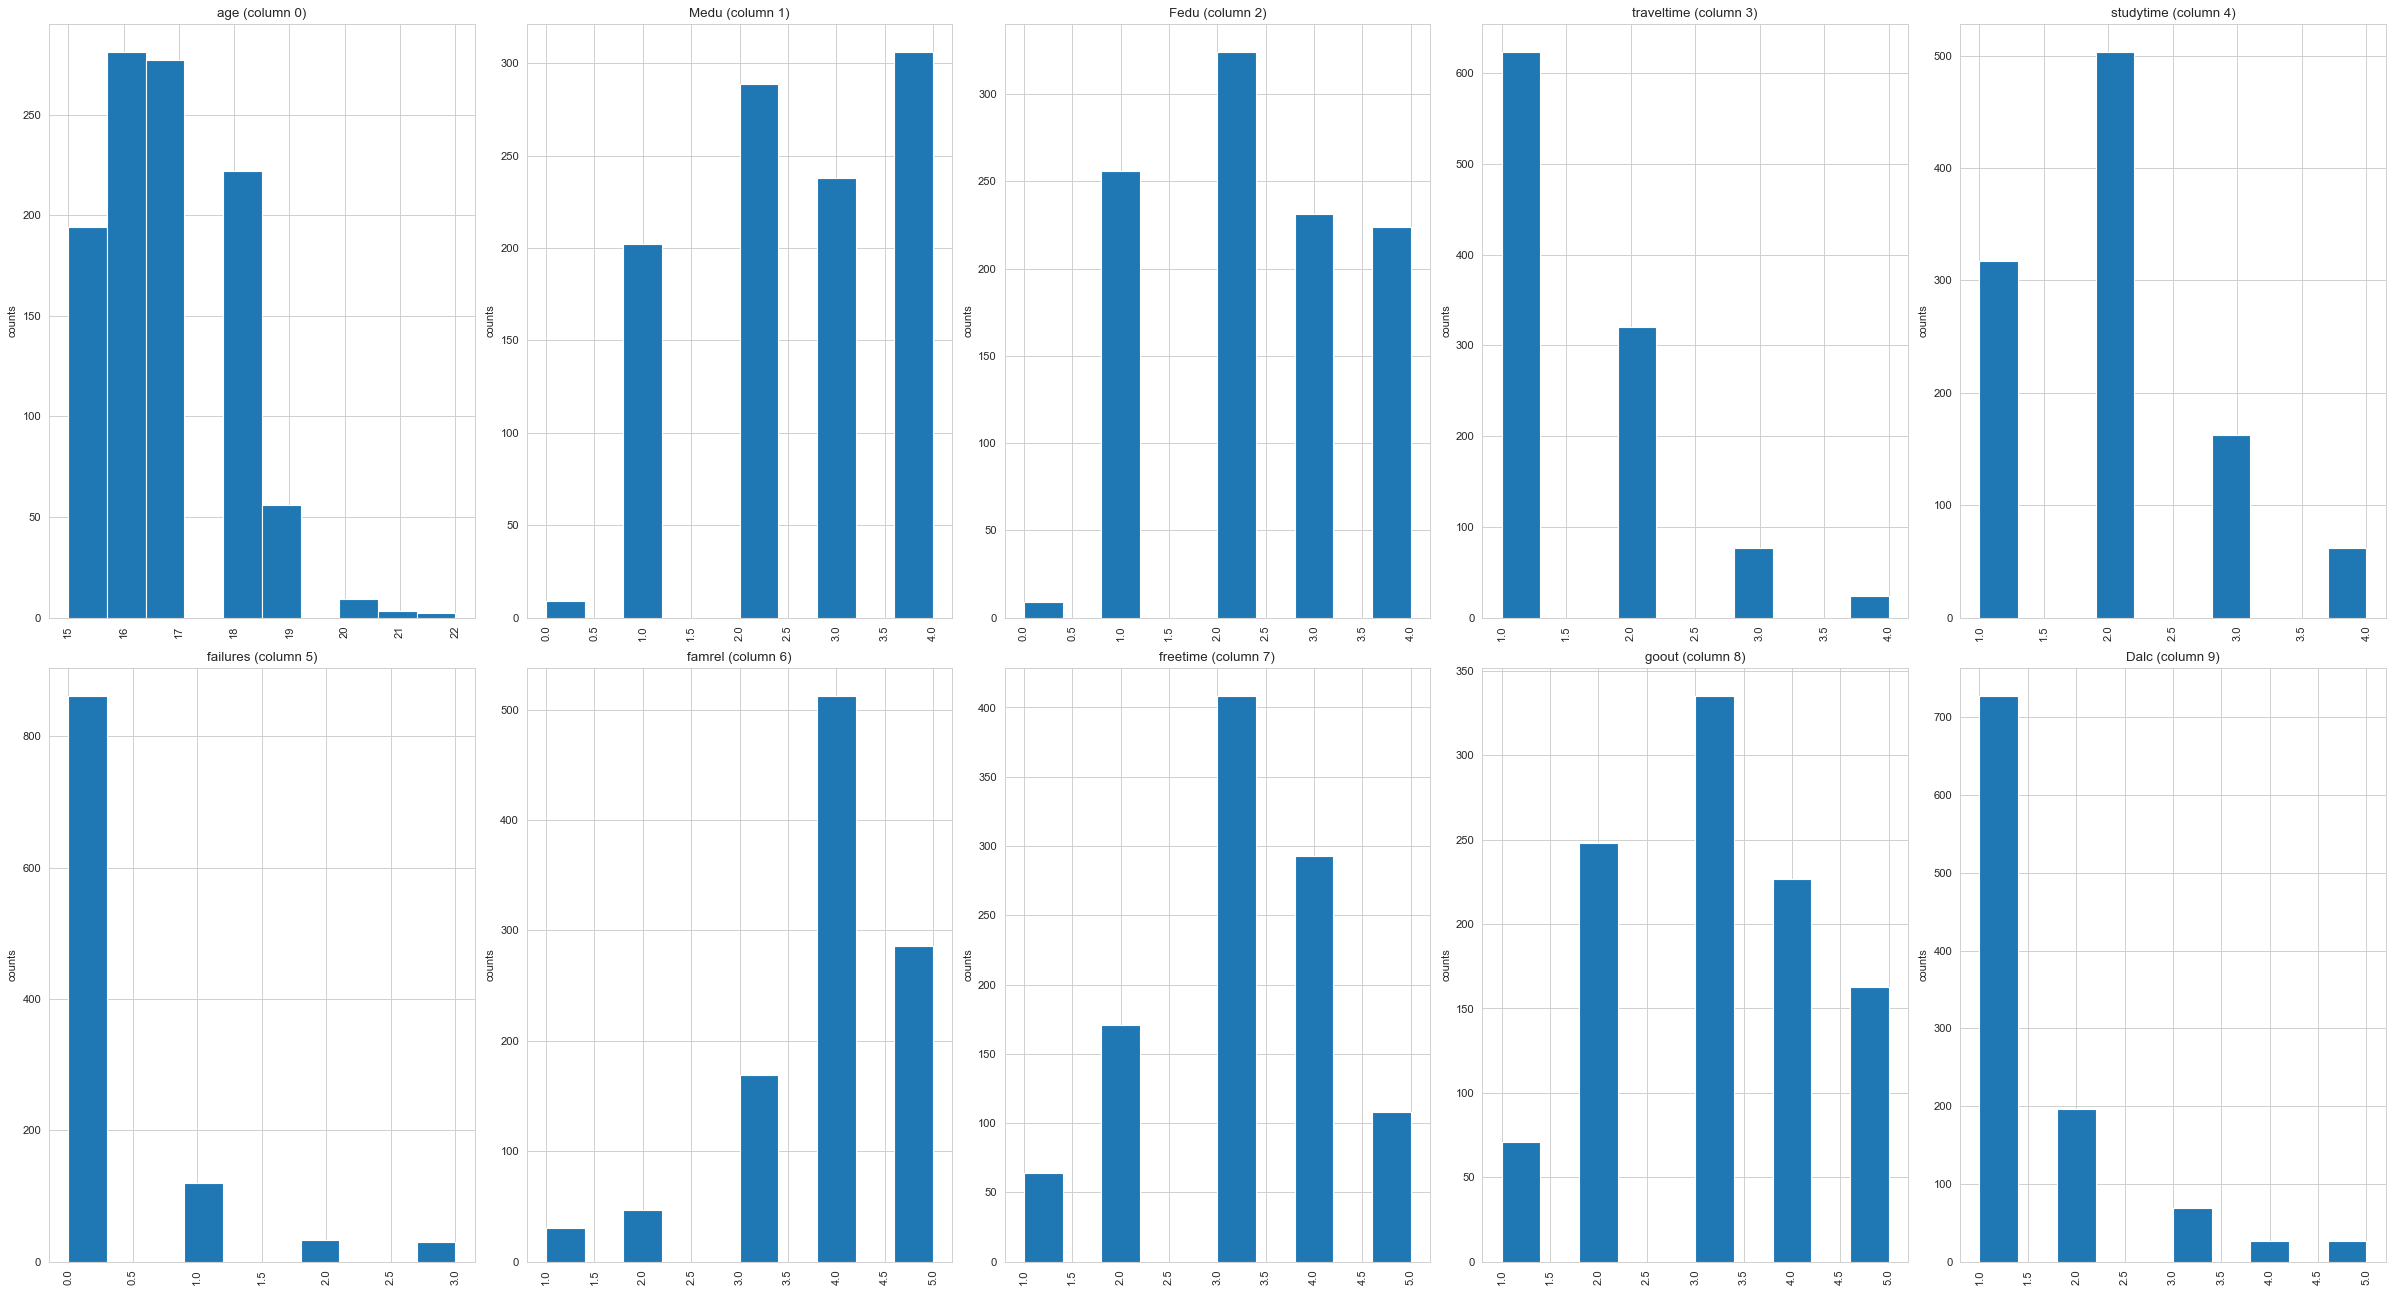

In [32]:
plotPerColumnDistribution(df_original, 10, 5)

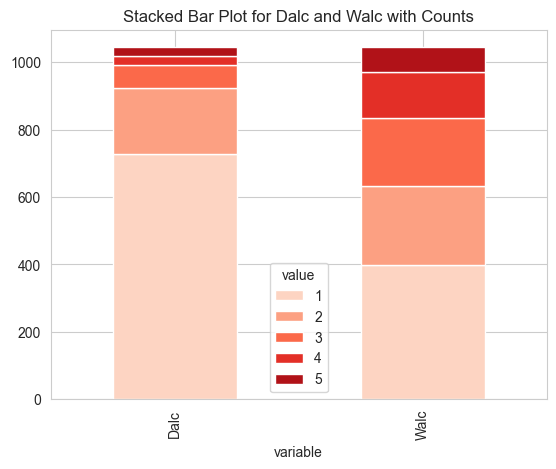

In [8]:
import matplotlib.pyplot as plt

sns.set_palette("Reds", 5)

subset_df = df[['Walc', 'Dalc']].copy()

count_df = subset_df.melt().groupby(['variable', 'value']).size().unstack()

ax = count_df.plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    # ax.annotate(f'{height}', (x + width/2, y + height), ha='center', va='top')

plt.title('Stacked Bar Plot for Dalc and Walc with Counts')
plt.savefig('barplot.png')
plt.show()

/var/folders/lr/j88t5txn53q1792_840bh3xr0000gp/T/ipykernel_49119/2772079176.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x="sex", y="Walc", palette=sns.color_palette("RdBu", 2))


<Axes: xlabel='sex', ylabel='Walc'>

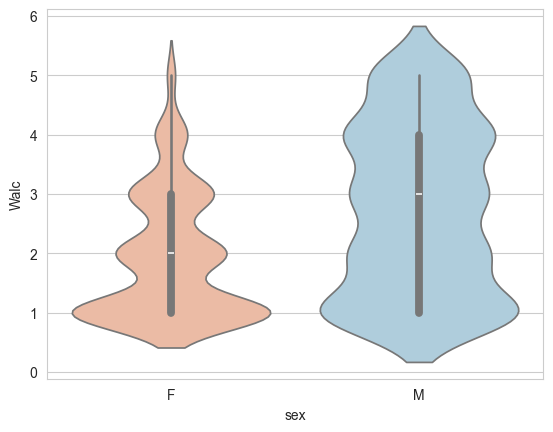

In [7]:
sns.violinplot(df, x="sex", y="Walc", palette=sns.color_palette("RdBu", 2))

In [8]:
from scipy.stats import chi2_contingency

# contingency_table = pd.crosstab(index = df['famrel'], columns = [df['Dalc'], df['Walc']])
contingency_table = pd.crosstab(df['studytime'], df['Walc'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)


print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Contingency Table:
Walc         1    2    3   4   5
studytime                       
1           82   74   57  63  41
2          199  112  102  66  24
3           79   41   34   6   2
4           38    8    7   3   6

Chi-Square Statistic: 85.25343650334702
P-value: 4.068350194030647e-13
Degrees of Freedom: 12
Expected Frequencies Table:
[[120.848659    71.35536398  60.72796935  41.90229885  22.16570881]
 [191.75670498 113.22318008  96.36015326  66.48850575  35.17145594]
 [ 61.75862069  36.46551724  31.03448276  21.4137931   11.32758621]
 [ 23.63601533  13.9559387   11.87739464   8.1954023    4.33524904]]


In [9]:
from scipy.stats import chi2_contingency

# contingency_table = pd.crosstab(index = df['famrel'], columns = [df['Dalc'], df['Walc']])
contingency_table = pd.crosstab(df['studytime'], df['Dalc'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)


print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Contingency Table:
Dalc         1   2   3   4   5
studytime                     
1          182  72  40   8  15
2          367  90  22  17   7
3          129  29   2   1   1
4           49   5   5   0   3

Chi-Square Statistic: 63.70616252984732
P-value: 4.724402040718742e-09
Degrees of Freedom: 12
Expected Frequencies Table:
[[220.74616858  59.51340996  20.95114943   7.89463602   7.89463602]
 [350.26915709  94.43295019  33.24425287  12.52681992  12.52681992]
 [112.81034483  30.4137931   10.70689655   4.03448276   4.03448276]
 [ 43.1743295   11.63984674   4.09770115   1.5440613    1.5440613 ]]
